In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import corner
import json
import argparse
import os
import sys

In [2]:
chain_folder = "all_chains/chains_earth_4_Jun23/"
burn_frac = 0.1

In [3]:
if os.path.isfile(f"{chain_folder}/chain_1.txt"):
    chain_file = f"{chain_folder}/chain_1.txt"
elif os.path.isfile(f"{chain_folder}/chain_1.0.txt"):
    chain_file = f"{chain_folder}/chain_1.0.txt"
else:
    print("Could not find any chain file in the chain folder! Exiting!")

In [4]:
param_names = np.genfromtxt(f"{chain_folder}/params.txt", dtype=str)
psrlist = np.genfromtxt(f"{chain_folder}/psrlist.txt", dtype=str)
chain = np.loadtxt(chain_file)
print(f"Chain shape = {chain.shape}")

Chain shape = (87700, 101)


In [5]:
burn = int(chain.shape[0] * burn_frac)

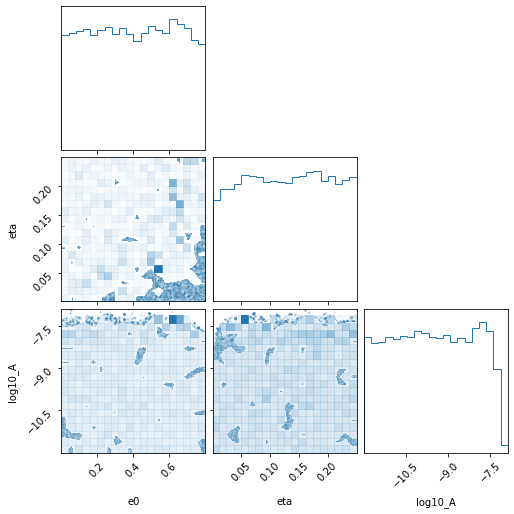

In [6]:
e_idx = np.where(param_names == "gwecc_e0")[0][0]
eta_idx = np.where(param_names == "gwecc_eta")[0][0]
A_idx = np.where(param_names == "gwecc_log10_A")[0][0]

corner.corner(chain[burn:, [e_idx, eta_idx, A_idx]], labels=["e0", "eta", "log10_A"],
                           color='C0', plot_contours=False, hist_kwargs={"density":True})
plt.show()

In [7]:
es = chain[burn:, e_idx]
etas = chain[burn:, eta_idx]
gwecc_log10_As = chain[burn:, A_idx]

In [8]:
# Define the number of bins for the first two parameters
num_bins = 8

# Calculate the bin indices for the first two parameters
e_bins = np.linspace(np.min(es), np.max(es), num_bins + 1)
eta_bins = np.linspace(np.min(etas), np.max(etas), num_bins + 1)

In [9]:
# Digitize the first two parameters to obtain the bin indices
e_bin_indices = np.digitize(es, e_bins)
eta_bin_indices = np.digitize(etas, eta_bins)

In [10]:
# Initialize an empty array to store the percentile values for each bin
percentiles = np.zeros((num_bins, num_bins))

In [11]:
# Calculate the 95th percentile value for each bin
for i in range(num_bins):
    for j in range(num_bins):
        # Select the data points that fall within the current bin
        mask = (e_bin_indices == i + 1) & (eta_bin_indices == j + 1)
        # Calculate the 95th percentile of the third parameter for the current bin
        percentiles[i, j] = np.percentile(gwecc_log10_As[mask], 95)

In [12]:
print(percentiles)

[[-7.63853105 -7.39781899 -7.66701179 -7.72823965 -7.74005335 -7.63208637
  -7.60266909 -7.58171405]
 [-7.55089787 -7.39497663 -7.44994924 -7.65962819 -7.63932377 -7.65107054
  -7.70487706 -7.60750687]
 [-7.58910513 -7.20928348 -7.53335981 -7.10791273 -7.42558918 -7.60081595
  -7.62754599 -7.60709003]
 [-7.53879249 -7.40893673 -7.26510905 -7.44948933 -7.55405055 -7.47258423
  -7.59370304 -7.51812347]
 [-7.65816104 -7.58332656 -7.18507215 -7.47564805 -7.45644776 -7.24710937
  -7.51191336 -7.6126623 ]
 [-8.0123182  -7.26312563 -7.26653609 -7.40989169 -7.35451464 -7.46524796
  -7.63387983 -7.40030782]
 [-8.20977364 -7.63190669 -7.45689591 -7.34555507 -7.31566832 -7.31513905
  -7.22856944 -7.30852994]
 [-8.54187201 -7.91623075 -7.79691272 -7.7327409  -7.57316467 -7.52395477
  -7.59421098 -7.7202034 ]]


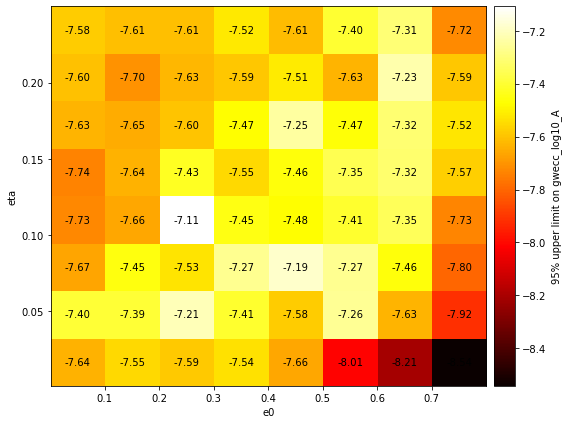

In [13]:
# Set the figure size and create the figure
fig = plt.figure(figsize=(8, 6))

# Create a colormap plot
ax = fig.add_subplot(111)
im = ax.imshow(percentiles.T, origin='lower', cmap='hot', aspect='auto', extent=[np.min(es), np.max(es), np.min(etas), np.max(etas)])
ax.set_xlabel('e0')
ax.set_ylabel('eta')
# ax.set_title('95% upper limit on gwecc_log10_A')

# Add text annotations to the colormap plot
for i in range(num_bins):
    for j in range(num_bins):
        value = percentiles[i, j]
        ax.text((e_bins[i] + e_bins[i + 1]) / 2, (eta_bins[j] + eta_bins[j + 1]) / 2, f'{value:.2f}', color='black', ha='center', va='center')


# Create the colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('95% upper limit on gwecc_log10_A')

# Adjust subplot spacing
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

# Save the figure with desired size and aspect ratio
# plt.savefig('colormap_plot.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [14]:
# # Create a colormap plot
# plt.figure(figsize=(8, 5))
# plt.imshow(percentiles.T, origin='lower', cmap='hot', aspect='auto', extent=[np.min(es), np.max(es), np.min(etas), np.max(etas)])
# plt.xlabel('First Parameter')
# plt.ylabel('Second Parameter')
# plt.title('95th Percentile of Third Parameter')
# plt.colorbar(label='Percentile')
# plt.show()